# DRAFT

In [213]:
import pystan
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy import linspace,hstack
import seaborn as sns; sns.set_context('notebook')

In [214]:
%matplotlib inline

In [215]:
# Import data
fish_productivity = pd.read_csv('./fish_catch_LME_npp_cb_per_km2.txt', sep="\t")

In [216]:
fish_productivity.head(4)

,OBJECTID,LME_NUMBER,LME_NAME,SUM_GIS_KM,npp_sum_LME,mean_catch_tonnage_1950_2014,mean_catch_tonnage_10yr_2004_2014,npp_ton_carbon,npp_carbon_ton_per_km2,tenyr_catch_km2
0,60,1,East Bering Sea,1320000.0,2.540000e+17,817460.2,900743.1,254000000.0,192.42,0.682
1,4,2,Gulf of Alaska,1530000.0,3.270000e+17,871076.7,853269.1,327000000.0,213.73,0.558
2,10,3,California Current,2220000.0,4.120000e+17,865133.0,1036357.0,412000000.0,185.59,0.467
3,20,4,Gulf of California,223000.0,4.650000e+16,403243.5,565684.0,46500000.0,208.52,2.540


In [217]:
fish_productivity.describe()

,OBJECTID,LME_NUMBER,SUM_GIS_KM,npp_sum_LME,mean_catch_tonnage_1950_2014,mean_catch_tonnage_10yr_2004_2014,npp_ton_carbon,npp_carbon_ton_per_km2,tenyr_catch_km2
count,64.000000,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,64.000000,64.000000
mean,32.531250,32.515625,1.253031e+06,2.201125e+17,1.305330e+06,1.572794e+06,2.201125e+08,181.822031,1.496814
std,18.674292,18.646241,9.367712e+05,1.644576e+17,1.703443e+06,2.360390e+06,1.644576e+08,55.496956,2.004151
min,1.000000,1.000000,1.040000e+05,1.760000e+16,4.600801e+02,3.320988e+02,1.760000e+07,38.250000,0.000305
25%,16.750000,16.750000,6.195000e+05,1.097500e+17,1.433230e+05,1.566965e+05,1.097500e+08,152.557500,0.201500
50%,32.500000,32.500000,1.020000e+06,1.735000e+17,7.644404e+05,6.972654e+05,1.735000e+08,183.270000,0.719500
75%,48.250000,48.250000,1.485000e+06,2.940000e+17,1.891549e+06,1.628511e+06,2.940000e+08,206.622500,1.995000
max,66.000000,65.000000,4.340000e+06,6.990000e+17,9.753014e+06,1.221295e+07,6.990000e+08,330.260000,9.300000


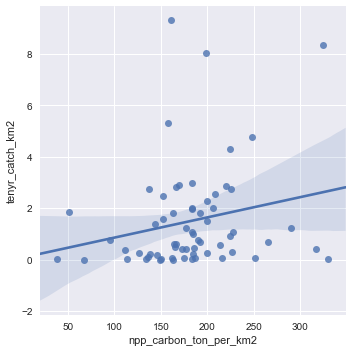

In [218]:
# Here we just want to plot the data over time. 
sns_plot = sns.lmplot("npp_carbon_ton_per_km2", "tenyr_catch_km2", data=fish_productivity, fit_reg=True)
sns_plot.savefig("fish_catch_vs_npp.png")

### Log transform the data

In [219]:
fish_productivity['log_tenyr_catch_km2'] = np.log(fish_productivity['tenyr_catch_km2'])
fish_productivity['log_npp_carbon_ton_per_km2'] = np.log(fish_productivity['npp_carbon_ton_per_km2'])

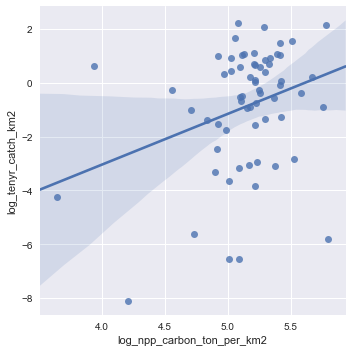

In [220]:
# Here we just want to plot the data over time. 
sns_plot = sns.lmplot("log_npp_carbon_ton_per_km2", "log_tenyr_catch_km2", data=fish_productivity, fit_reg=True)
sns_plot.savefig("log_fish_catch_vs_npp.png")

In [251]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/ara/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [438]:
catch_npp_model = ols("tenyr_catch_km2 ~ npp_carbon_ton_per_km2", data=fish_productivity).fit()

In [439]:
catch_npp_model_summary = catch_npp_model.summary()

In [440]:
catch_npp_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tenyr_catch_km2   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     3.090
Date:                Wed, 18 Oct 2017   Prob (F-statistic):             0.0837
Time:                        16:44:00   Log-Likelihood:                -133.25
No. Observations:                  64   AIC:                             270.5
Df Residuals:                      62   BIC:                             274.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0662      0.850      0.078      0.938      -1.634       1.766
npp_carbon_ton_per_km2     0.0079      0.004      1.758      0.084      -0.001       0.017
==============================================================================
Omnibus:                       42.483   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.229
Skew:                           2.115   Prob(JB):                     5.77e-26
Kurtosis:                       8.068   Cond. No.                         655.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Linear model graph code from http://www.learndatasci.com/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/, Tim Dobbins and John Burke, accessed 18/10/17 

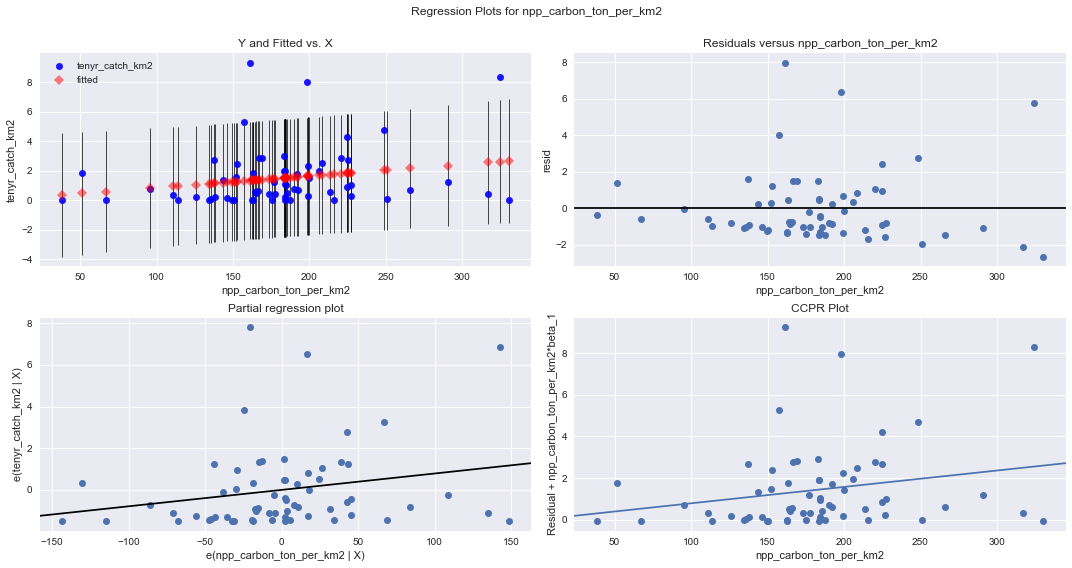

In [442]:
# use figsize to adjust size, and pass in to plot_regress_exog
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(catch_npp_model, "npp_carbon_ton_per_km2", fig=fig)

### Stan modelling section

In [593]:
x = fish_productivity.npp_carbon_ton_per_km2.tolist()
y = fish_productivity.tenyr_catch_km2.tolist()
N = len(x)

In [594]:
print(x)

[192.42, 213.73, 185.59, 208.52, 184.42, 173.27, 224.84, 190.18, 164.1, 162.44, 265.83, 146.34, 248.44, 290.6, 177.5, 184.26, 316.98, 137.96, 135.83, 166.16, 183.96, 220.46, 199.24, 183.73, 152.13, 95.65, 157.52, 163.21, 227.21, 199.24, 226.95, 176.96, 111.02, 183.47, 161.1, 183.07, 192.16, 200.0, 250.96, 183.72, 175.3, 150.42, 134.31, 187.29, 215.92, 164.95, 198.21, 324.26, 143.61, 137.37, 205.99, 225.0, 224.58, 126.12, 67.16, 113.92, 330.26, 162.79, 152.7, 169.23, 38.25, 51.4, 149.6, 166.8]


In [595]:
print(y)

[0.682, 0.5579999999999999, 0.467, 2.54, 1.01, 0.396, 4.28, 0.7490000000000001, 0.595, 0.0418, 0.69, 0.17300000000000001, 4.77, 1.24, 0.39799999999999996, 0.21100000000000002, 0.41, 0.214, 0.0864, 0.618, 1.09, 2.85, 2.29, 1.96, 1.56, 0.755, 5.33, 1.82, 1.06, 0.263, 0.28, 1.23, 0.365, 1.99, 9.3, 2.98, 1.8, 1.49, 0.0587, 0.0216, 0.0473, 0.0261, 0.0361, 0.0521, 0.0455, 0.5, 8.02, 8.36, 1.4, 2.73, 2.01, 2.75, 0.914, 0.248, 0.000305, 0.0036299999999999995, 0.0030600000000000002, 0.00145, 2.46, 2.88, 0.0146, 1.83, 0.00145, 2.84]


In [600]:
# make a dictionary containing all data to be passed to STAN
regress_dat = {'x': x,
 'y': y,
 'N': N}

In [501]:
regress_simple = """
data {
  int<lower=0> N;
  vector[N] y;
  vector[N] x;
}
parameters {
  vector[2] beta;
  real<lower=0> sigma;
}
model {
  y ~ normal(beta[1] + beta[2] * x, sigma);
}
"""

In [502]:
# Fit the model
fit_simple = pystan.stan(model_code=regress_simple, data=regress_dat, verbose=True,
 iter=4000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_52f929b40eb34cd97ae8591ae02a09aa NOW.
INFO:pystan:OS: darwin, Python: 3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)], Cython 0.25.2


Compiling /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmpvt_u30pb/stanfit4anon_model_52f929b40eb34cd97ae8591ae02a09aa_6199692894027875443.pyx because it changed.
[1/1] Cythonizing /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmpvt_u30pb/stanfit4anon_model_52f929b40eb34cd97ae8591ae02a09aa_6199692894027875443.pyx
building 'stanfit4anon_model_52f929b40eb34cd97ae8591ae02a09aa_6199692894027875443' extension
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmpvt_u30pb/var
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmpvt_u30pb/var/folders
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmpvt_u30pb/var/folders/sz
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmpvt_u30pb/var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmpvt_u30pb/var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmpvt_u30pb/var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0

In [503]:
print(fit_simple)

Inference for Stan model: anon_model_52f929b40eb34cd97ae8591ae02a09aa.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta[0]   0.06    0.02   0.87  -1.66  -0.52   0.06   0.64   1.76   2543    1.0
beta[1] 7.9e-3  8.9e-5 4.6e-3-1.2e-3 4.8e-3 7.9e-3   0.01   0.02   2630    1.0
sigma     2.01  3.0e-3   0.18   1.69   1.88    2.0   2.12   2.41   3770    1.0
lp__    -75.29    0.02   1.24 -78.57 -75.84 -74.97 -74.38 -73.88   2957    1.0

Samples were drawn using NUTS at Thu Oct 19 07:53:11 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [504]:
regress_simple_para = """
data {
  int<lower=0> N;
  vector[N] y;
  vector[N] x;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  y ~ normal(alpha + beta * x, sigma);
}
"""

In [505]:
# Fit the model
regress_simple_para = pystan.stan(model_code=regress_simple_para, data=regress_dat, verbose=True,
 iter=4000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c862b13cc9c9844fa617175a5bb39e00 NOW.
INFO:pystan:OS: darwin, Python: 3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)], Cython 0.25.2


Compiling /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp42m_sm0a/stanfit4anon_model_c862b13cc9c9844fa617175a5bb39e00_328441496914097200.pyx because it changed.
[1/1] Cythonizing /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp42m_sm0a/stanfit4anon_model_c862b13cc9c9844fa617175a5bb39e00_328441496914097200.pyx
building 'stanfit4anon_model_c862b13cc9c9844fa617175a5bb39e00_328441496914097200' extension
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp42m_sm0a/var
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp42m_sm0a/var/folders
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp42m_sm0a/var/folders/sz
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp42m_sm0a/var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp42m_sm0a/var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp42m_sm0a/var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000

In [506]:
print(regress_simple_para)

Inference for Stan model: anon_model_c862b13cc9c9844fa617175a5bb39e00.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   0.08    0.02   0.88  -1.62   -0.5   0.07   0.67   1.82   2753    1.0
beta  7.7e-3  8.8e-5 4.6e-3-1.4e-3 4.7e-3 7.9e-3   0.01   0.02   2753    1.0
sigma   2.02  3.1e-3   0.19   1.69   1.88    2.0   2.13   2.43   3660    1.0
lp__  -75.31    0.03   1.27 -78.67 -75.87  -75.0  -74.4 -73.87   2572    1.0

Samples were drawn using NUTS at Thu Oct 19 07:54:57 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [553]:
regress_priors = """
data {
  int<lower=0> N;
  vector[N] y;
  vector[N] x;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  alpha ~ normal(0,10);    
  beta ~ cauchy(0,5);
  sigma ~ cauchy(0,5);

  for (n in 1:N)
    y[n] ~ normal(alpha + beta * x[n], sigma);
}
"""

In [554]:
# Fit the model
regress_priors_fit = pystan.stan(model_code=regress_priors, data=regress_dat, verbose=True,
 iter=4000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_eb00f22a4ebdfb110e655ea043db86a2 NOW.
INFO:pystan:OS: darwin, Python: 3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)], Cython 0.25.2


Compiling /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp54pod7_o/stanfit4anon_model_eb00f22a4ebdfb110e655ea043db86a2_464605767353621163.pyx because it changed.
[1/1] Cythonizing /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp54pod7_o/stanfit4anon_model_eb00f22a4ebdfb110e655ea043db86a2_464605767353621163.pyx
building 'stanfit4anon_model_eb00f22a4ebdfb110e655ea043db86a2_464605767353621163' extension
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp54pod7_o/var
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp54pod7_o/var/folders
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp54pod7_o/var/folders/sz
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp54pod7_o/var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp54pod7_o/var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp54pod7_o/var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000

In [555]:
print(regress_priors_fit)

Inference for Stan model: anon_model_eb00f22a4ebdfb110e655ea043db86a2.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   0.08    0.02   0.84  -1.55  -0.49   0.07   0.64   1.75   2480    1.0
beta  7.8e-3  9.1e-5 4.4e-3-9.1e-4 4.8e-3 7.9e-3   0.01   0.02   2357    1.0
sigma   2.01  3.1e-3   0.18   1.69   1.88    2.0   2.12   2.42   3503    1.0
lp__  -75.44    0.03   1.26 -78.73 -75.99 -75.09 -74.53 -74.03   2428    1.0

Samples were drawn using NUTS at Thu Oct 19 09:28:45 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


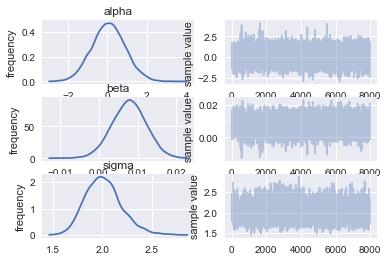

In [556]:
# show a traceplot of ALL parameters. This is a bear if you have many
regress_priors_fit.traceplot()
plt.show()

In [557]:
import stan_utility

In [558]:
stan_utility.check_treedepth(regress_priors_fit)

0 of 8000 iterations saturated the maximum tree depth of 10 (0.0%)


In [559]:
stan_utility.check_energy(regress_priors_fit)

In [560]:
stan_utility.check_div(regress_priors_fit)

0.0 of 8000 iterations ended with a divergence (0.0%)


In [561]:
##### PREDICTION ####
 
# make a dataframe of parameter estimates for all chains
samples = regress_priors_fit.extract(permuted=True)
params = pd.DataFrame({'a': samples['alpha'], 'b': samples['beta']})
len(samples['alpha'])
 
# next, make a prediction function. Making a function makes every step following this 10 times easier
def stanPred(p):
 fitted = p[0] + p[1] * predX
 return pd.Series({'fitted': fitted})
 
# make a prediction vector (the values of X for which you want to predict)
predX = np.arange(0, 400 )
 
# get the median parameter estimates
medParam = params.median()
# predict
yhat = stanPred(medParam)
 
# get the predicted values for each chain. This is super convenient in pandas because
# it is possible to have a single column where each element is a list
chainPreds = params.apply(stanPred, axis = 1)

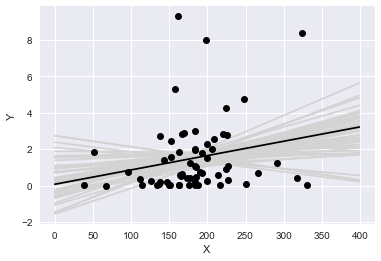

In [562]:
## PLOTTING
 
# create a random index for chain sampling
idx = np.random.choice(1999, 50)
# plot each chain. chainPreds.iloc[i, 0] gets predicted values from the ith set of parameter estimates
for i in range(len(idx)):
 plt.plot(predX, chainPreds.iloc[idx[i], 0], color='lightgrey')
 
# original data
plt.plot(x,y, 'ko')
# fitted values
plt.plot(predX, yhat['fitted'], 'k')
 
# supplementals
plt.xlabel('X')
plt.ylabel('Y')
 
plt.show()

In [605]:
regress_post_pred = """
data {
  int<lower=0> N;
  vector[N] y;
  vector[N] x;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  alpha ~ normal(0,10);    
  beta ~ cauchy(0,5);
  sigma ~ cauchy(0,5);

  for (n in 1:N)
    y[n] ~ normal(alpha + beta * x[n], sigma);
}
generated quantities {

  vector[N] y_pred;
  for (n in 1:N)
    y_pred[n] = normal_rng(alpha + beta * x[n], sigma); 
}
"""

In [606]:
# Fit the model
regress_post_pred_fit = pystan.stan(model_code=regress_post_pred, data=regress_dat, verbose=True,
 iter=4000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c3ced0490e1f1b4908eb8242c8e34103 NOW.
INFO:pystan:OS: darwin, Python: 3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)], Cython 0.25.2


Compiling /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp36_s92s7/stanfit4anon_model_c3ced0490e1f1b4908eb8242c8e34103_2054826447924989528.pyx because it changed.
[1/1] Cythonizing /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp36_s92s7/stanfit4anon_model_c3ced0490e1f1b4908eb8242c8e34103_2054826447924989528.pyx
building 'stanfit4anon_model_c3ced0490e1f1b4908eb8242c8e34103_2054826447924989528' extension
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp36_s92s7/var
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp36_s92s7/var/folders
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp36_s92s7/var/folders/sz
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp36_s92s7/var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp36_s92s7/var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T
creating /var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0000gn/T/tmp36_s92s7/var/folders/sz/c8lxp6kj6yq89fhnzt2nxqhc0

In [607]:
print(regress_post_pred_fit)

Inference for Stan model: anon_model_c3ced0490e1f1b4908eb8242c8e34103.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha        0.07    0.02   0.86  -1.61  -0.52   0.06   0.65   1.72   2777    1.0
beta       7.9e-3  8.5e-5 4.5e-3-7.4e-4 4.9e-3 7.9e-3   0.01   0.02   2778    1.0
sigma         2.0  3.1e-3   0.18   1.68   1.87   1.99   2.12   2.41   3594    1.0
y_pred[0]    1.59    0.02   2.02  -2.44   0.26   1.61   2.92   5.46   7588    1.0
y_pred[1]    1.72    0.02   2.02  -2.27   0.37    1.7   3.04   5.68   7653    1.0
y_pred[2]    1.52    0.02   2.04  -2.53   0.19   1.52   2.86   5.53   7660    1.0
y_pred[3]    1.73    0.02   2.02  -2.21   0.39   1.73   3.09   5.72   8000    1.0
y_pred[4]    1.53    0.02   2.02  -2.45   0.18   1.52   2.85   5.52   8000    1.0
y_pred[5]    1.41    0.02   2.05  -2.65   0.04    1.4   2.77   5.49   790

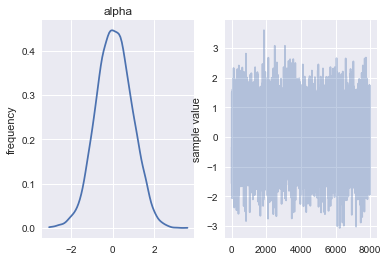

In [608]:
# Instead, show a traceplot for single parameter
regress_post_pred_fit.plot(['alpha'])
plt.show()

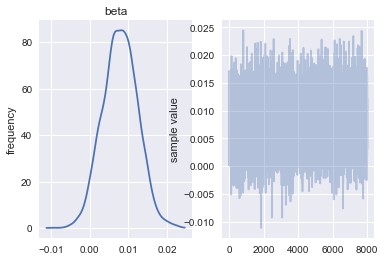

In [609]:
# Instead, show a traceplot for single parameter
regress_post_pred_fit.plot(['beta'])
plt.show()

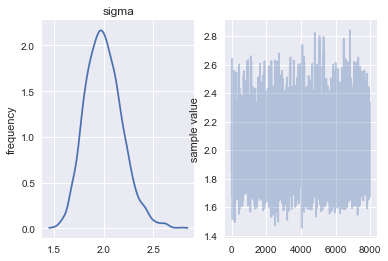

In [610]:
# Instead, show a traceplot for single parameter
regress_post_pred_fit.plot(['sigma'])
plt.show()

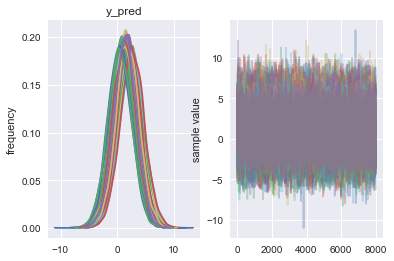

In [611]:
# Instead, show a traceplot for single parameter
regress_post_pred_fit.plot(['y_pred'])
plt.show()

In [612]:
samples = regress_post_pred_fit.extract(permuted=True)

In [613]:
ypred = samples['y_pred']

In [614]:
np.mean(ypred, axis=0)

array([ 1.58589984,  1.7158959 ,  1.51770521,  1.73427689,  1.52908013,
        1.40705192,  1.83815055,  1.6114205 ,  1.35369704,  1.35705473,
        2.17668377,  1.2042185 ,  2.0256243 ,  2.38187196,  1.50849917,
        1.55125142,  2.52980144,  1.16081771,  1.09533472,  1.39559609,
        1.49643974,  1.81219752,  1.63169513,  1.51644491,  1.27027162,
        0.83044502,  1.3191246 ,  1.38823931,  1.89223575,  1.6314478 ,
        1.90925783,  1.43592763,  0.97908323,  1.49232742,  1.31623256,
        1.51339919,  1.57913441,  1.63953987,  2.08123804,  1.54241676,
        1.49162128,  1.227125  ,  1.08101628,  1.53720371,  1.77940001,
        1.37327786,  1.64898697,  2.63445484,  1.19937173,  1.11635821,
        1.66934171,  1.83913469,  1.87445167,  1.04718535,  0.63234844,
        0.97980017,  2.70404743,  1.3467882 ,  1.27711795,  1.37598748,
        0.39107558,  0.45270155,  1.22105267,  1.39060307])

In [615]:
fish_productivity['y_pred'] = np.mean(ypred, axis=0)

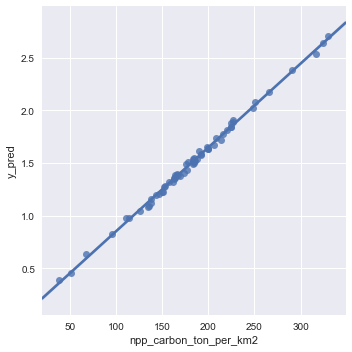

In [616]:
sns_plot = sns.lmplot("npp_carbon_ton_per_km2", "y_pred", data=fish_productivity, fit_reg=True)